Module 1: Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Module 2: Set Base Path and List Folder Contents

In [2]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/gdrive')

# Path to the folder in your Google Drive
base_path = '/content/gdrive/MyDrive/Archive/'

# List the contents of the folder
folder_contents = os.listdir(base_path)

# Print the contents
print("Contents of the folder:")
for item in folder_contents:
    print(item)


Mounted at /content/gdrive
Contents of the folder:
test
train
__MACOSX
val


Module 3: Load Dataset and Apply Data Augmentation

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image dimensions and batch size
img_height = 150
img_width = 150
batch_size = 32

# Create data generators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Rescale test and validation images
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using the generators
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_path, 'train'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # Assuming binary classification (Pneumonia or Normal)
)

# Flow validation images in batches using the generators
val_generator = val_datagen.flow_from_directory(
    os.path.join(base_path, 'val'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Flow test images in batches using the generators
test_generator = test_datagen.flow_from_directory(
    os.path.join(base_path, 'test'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Module 4: Build the CNN Model

In [4]:
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Module 5: Train the CNN Model

In [5]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

Epoch 1/10
163/163 [==============================] - 627s 3s/step - loss: 0.3439 - accuracy: 0.8461 - val_loss: 0.7078 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 90s 553ms/step - loss: 0.2281 - accuracy: 0.9095 - val_loss: 0.6038 - val_accuracy: 0.6875
Epoch 3/10
163/163 [==============================] - 90s 552ms/step - loss: 0.1980 - accuracy: 0.9239 - val_loss: 0.9565 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 91s 554ms/step - loss: 0.1674 - accuracy: 0.9344 - val_loss: 0.4694 - val_accuracy: 0.6875
Epoch 5/10
163/163 [==============================] - 90s 548ms/step - loss: 0.1665 - accuracy: 0.9373 - val_loss: 0.4063 - val_accuracy: 0.8750
Epoch 6/10
163/163 [==============================] - 90s 550ms/step - loss: 0.1522 - accuracy: 0.9427 - val_loss: 0.5662 - val_accuracy: 0.6250
Epoch 7/10
163/163 [==============================] - 89s 543ms/step - loss: 0.1387 - accuracy: 0.9488 - val_loss: 0.8535 - val_accu

Module 6: Evaluate the Model

In [6]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Accuracy:", test_acc)

19/19 [==============================] - 199s 11s/step - loss: 0.5915 - accuracy: 0.8306
Test Accuracy: 0.8305920958518982


Module 7: Plot Training and Validation Accuracy

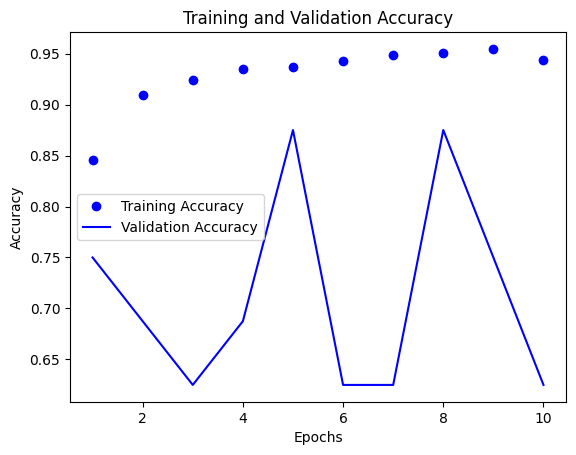

In [7]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy over epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()